In [39]:
# import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

### Import Data

In [40]:
# read in the states data
states_df = pd.read_csv("db/states_energy.csv")
states_df.head()

,Unnamed: 0,State,Year,Produced Renewable(Billion Btu),Total Consumed(Billion Btu),GDP(Million dollars),Population(Thousand),Energy Price(dollars per million btu)
0,0,Alaska,1970,8835.0,182039.0,0.0,304.0,1.39
1,1,Alabama,1970,132471.0,1393497.0,0.0,3451.0,1.37
2,2,Arkansas,1970,56933.0,708904.0,0.0,1932.0,1.51
3,3,Arizona,1970,68919.0,520401.0,0.0,1792.0,1.97
4,4,California,1970,521978.0,5499139.0,0.0,20007.0,1.74


In [41]:
# Drop Consumption from the table
states_df = states_df.drop(['Unnamed: 0'], axis=1)
states_df = states_df.rename(columns={'Produced Renewable(Billion Btu)': 'Prod. Renewable (Bil. Btu)',
                                      'Total Consumed(Billion Btu)': 'Total Consumed (Bil. Btu)',
                                     'GDP(Million dollars)': 'GDP (Millions)', 'Population(Thousand)' : 'Pop. (1000s)',
                                     'Energy Price(dollars per million btu)': 'Energy Pr. ($/mil. btu)'})

states_df.head()

,State,Year,Prod. Renewable (Bil. Btu),Total Consumed (Bil. Btu),GDP (Millions),Pop. (1000s),Energy Pr. ($/mil. btu)
0,Alaska,1970,8835.0,182039.0,0.0,304.0,1.39
1,Alabama,1970,132471.0,1393497.0,0.0,3451.0,1.37
2,Arkansas,1970,56933.0,708904.0,0.0,1932.0,1.51
3,Arizona,1970,68919.0,520401.0,0.0,1792.0,1.97
4,California,1970,521978.0,5499139.0,0.0,20007.0,1.74


In [42]:
# Create test state df for North Carolina

nc_df = states_df.loc[(states_df['Year'] >= 1997) & (states_df['State'] == 'North Carolina')]
display(nc_df.head())
# display(nc_df.tail())
nc_df.loc[nc_df['Year'] == 2017, 'Prod. Renewable (Bil. Btu)'].values[0]

,State,Year,Prod. Renewable (Bil. Btu),Total Consumed (Bil. Btu),GDP (Millions),Pop. (1000s),Energy Pr. ($/mil. btu)
1404,North Carolina,1997,164819.0,2420159.0,316366.0,7657.0,10.04
1455,North Carolina,1998,159627.0,2463893.0,326225.0,7809.0,9.46
1506,North Carolina,1999,139731.0,2473188.0,344425.0,7949.0,9.80
1557,North Carolina,2000,136234.0,2587792.0,354846.0,8082.0,11.51
1608,North Carolina,2001,127348.0,2534318.0,361354.0,8210.0,11.67


217876.0

### Multiple Liner Regression (MLR) Test 

In [43]:
# Find future value for one state - North Carolina
# Test is run on Produced Renewable Column using simple LR

# Select X & y values
X = nc_df[['Year']].values.reshape(-1,1)
y = nc_df[['Prod. Renewable (Bil. Btu)']].values.reshape(-1,1)

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')


X shape: (21, 1)
y shape: (21, 1)


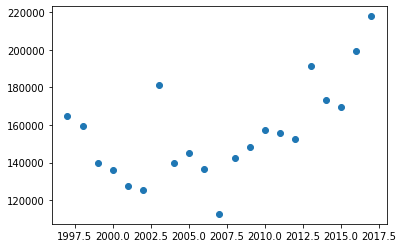

In [44]:
# Plot the data for a quick visual... is it linear? 

plt.scatter(X,y)

In [45]:
# Split the data into Training and Test Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=69)

In [46]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
# calculate the model's scores

training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.28294955289353985
Testing Score: 0.6311980113673878


In [48]:
#Find the best test scores

# import operator

# # Create For loop to find the best avg. test score for NC
# test_scores = []
# high_score = [] 
# high_seed = []


# def mean(array):
#     length_arr = len(array)
#     sum_arr = sum(array)
    
#     return sum_arr / length_arr

# for seed in range(0,101):
    
#     X = nc_df[['Year']].values.reshape(-1,1)
#     y = nc_df[['Prod. Renewable (Bil. Btu)']].values.reshape(-1,1)

#     X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= seed)

#     model = LinearRegression()
#     model.fit(X_train, y_train)

#     training_score = model.score(X_train, y_train)
#     testing_score = model.score(X_test, y_test)
    
#     test_scores.append(testing_score)
    
#     print(f'Seed: {seed}, Test Score: {testing_score}')
    
    
#     seed += 1
    

# print('''''')    
# print(f'Best Testing Score: {max(test_scores)}')    



    

    
    

In [49]:
# Best seed is 56
# Use our model to make predictions
from sklearn.metrics import mean_squared_error, r2_score


predicted = model.predict(X_test)

In [50]:
# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")


predictions = model.predict(X_test[:5])
print(f"Predicted classes: {predictions}")

n_2021 = model.predict([[2021]])
n_2025 = model.predict([[2025]])
n_2030 = model.predict([[2030]])

print('''''')
print(f"North Carolina's Renewable Production in 2017: {int(nc_df.loc[nc_df['Year'] == 2017, 'Prod. Renewable (Bil. Btu)'].values[0])}")

print('''''')      
print(f'Prediction for 2021: {int(n_2021[0][0])}')
      
print('''''')      
print(f'Prediction for 2021: {int(n_2025[0][0])}')
      
print('''''')      
print(f'Prediction for 2021: {int(n_2030[0][0])}')

Mean Squared Error (MSE): 119067995.14840044
R-squared (R2 ): 0.6311980113673878
Predicted classes: [[166109.34551887]
 [170904.92216981]
 [175700.49882076]
 [149324.82724057]
 [137335.88561321]]

North Carolina's Renewable Production in 2017: 217876

Prediction for 2021: 190087

Prediction for 2021: 199678

Prediction for 2021: 211667


# R2 scores for features

In [51]:
# # Find best R2 Scores

# # read in data
# states_df = pd.read_csv("db/states_energy.csv")
# states_df = states_df.drop(['Unnamed: 0'], axis=1)
# states_df = states_df.rename(columns={'Produced Renewable(Billion Btu)': 'Prod. Renewable (Bil. Btu)',
#                                       'Total Consumed(Billion Btu)': 'Total Consumed (Bil. Btu)',
#                                      'GDP(Million dollars)': 'GDP (Millions)', 'Population(Thousand)' : 'Pop. (1000s)',
#                                      'Energy Price(dollars per million btu)': 'Energy Pr. ($/mil. btu)'})




# # Get arrays of states, scores
# states = states_df["State"].unique()
# rp_r2_scores = []
# rp_r2_averages = []

# GDP_r2_scores = []
# GDP_r2_averages = []

# pop_r2_scores = []
# pop_r2_averages = []

# ep_r2_scores = []
# ep_r2_averages = []


# # Create mean function
# def mean(array):
#     length_arr = len(array)
#     sum_arr = sum(array)
    
#     return sum_arr / length_arr


# #Create the Loop


# for n in range(101):
#     for state in states:
        
#         # Select the state & year
#         states_df = states_df.loc[(states_df["State"] == state) & (states_df["Year"] >= 1970)]
        
        
#         # Renewable Production #
#         #======================#
        
        
#         # Select X & y for Renewable Production (RP) and reshape for each state
#         rp_X = states_df[['Year']].values.reshape(-1,1)
#         rp_y = states_df[['Prod. Renewable (Bil. Btu)']].values.reshape(-1,1)
        
#         # Split RP Data into training & test data
#         rp_X_train, rp_X_test, rp_y_train, rp_y_test = train_test_split(rp_X, rp_y, random_state= n)
        
#         # Create and fit the models for each state for RP
#         model = LinearRegression()
#         model.fit(rp_X_train, rp_y_train)
        
#         # Calculate the RP testing & training scores
#         rp_training_score = model.score(rp_X_train, rp_y_train)
#         rp_testing_score = model.score(rp_X_test, rp_y_test)
        
#         # Use our models to make RP predictions
#         rp_predicted = model.predict(rp_X_test)
        
#         # Score the RP predictions with mse and r2 for each state
#         rp_mse = mean_squared_error(rp_y_test, rp_predicted)
#         rp_r2 = r2_score(rp_y_test, rp_predicted)
        
#         # Populate RP r2 score array for averaging later
#         rp_r2_scores.append(rp_r2)
        
    
    


   
        
#         #  GDP  #
#         #=======#
        
        
#         # Select X & y for GDP and reshape for each state
#         GDP_X = states_df[['Year']].values.reshape(-1,1)
#         GDP_y = states_df[['GDP (Millions)']].values.reshape(-1,1)
        
#         # Split RP Data into training & test data
#         GDP_X_train, GDP_X_test, GDP_y_train, GDP_y_test = train_test_split(GDP_X, GDP_y, random_state= n)
        
#         # Create and fit the models for each state for GDP
#         model = LinearRegression()
#         model.fit(GDP_X_train, GDP_y_train)
        
#         # Calculate the GDP testing & training scores
#         GDP_training_score = model.score(GDP_X_train, GDP_y_train)
#         GDP_testing_score = model.score(GDP_X_test, GDP_y_test)
        
#         # Use our models to make GDP predictions
#         GDP_predicted = model.predict(GDP_X_test)
        
#         # Score the GDP predictions with mse and r2 for each state
#         GDP_mse = mean_squared_error(GDP_y_test, GDP_predicted)
#         GDP_r2 = r2_score(GDP_y_test, GDP_predicted)
        
#         # Populate GDP r2 score array for averaging later
#         GDP_r2_scores.append(GDP_r2)
        
        
   
        

#         #  Population  #
#         #==============#
        
        
#         # Select X & y for Population (Pop.) and reshape for each state
#         pop_X = states_df[['Year']].values.reshape(-1,1)
#         pop_y = states_df[['Pop. (1000s)']].values.reshape(-1,1)
        
#         # Split Pop. Data into training & test data
#         pop_X_train, pop_X_test, pop_y_train, pop_y_test = train_test_split(pop_X, pop_y, random_state= n)
        
#         # Create and fit the models for each state for pop
#         model = LinearRegression()
#         model.fit(pop_X_train, pop_y_train)
        
#         # Calculate the Pop. testing & training scores
#         pop_training_score = model.score(pop_X_train, pop_y_train)
#         pop_testing_score = model.score(pop_X_test, pop_y_test)
        
#         # Use our models to make Pop. predictions
#         pop_predicted = model.predict(pop_X_test)
        
#         # Score the Pop. predictions with mse and r2 for each state
#         pop_mse = mean_squared_error(pop_y_test, pop_predicted)
#         pop_r2 = r2_score(pop_y_test, pop_predicted)
        
#         # Populate Pop. r2 score array for averaging later
#         pop_r2_scores.append(pop_r2)
        
   
    
    
    
#         #  Energy Price #
#         #==============#
        
        
#         # Select X & y for Energy Price (ep) and reshape for each state
#         ep_X = states_df[['Year']].values.reshape(-1,1)
#         ep_y = states_df[['Energy Pr. ($/mil. btu)']].values.reshape(-1,1)
        
#         # Split ep Data into training & test data
#         ep_X_train, ep_X_test, ep_y_train, ep_y_test = train_test_split(ep_X, ep_y, random_state= n)
        
#         # Create and fit the models for each state for ep
#         model = LinearRegression()
#         model.fit(ep_X_train, ep_y_train)
        
#         # Calculate the ep testing & training scores
#         ep_training_score = model.score(ep_X_train, ep_y_train)
#         ep_testing_score = model.score(ep_X_test, ep_y_test)
        
#         # Use our models to make ep predictions
#         ep_predicted = model.predict(ep_X_test)
        
#         # Score the ep predictions with mse and r2 for each state
#         ep_mse = mean_squared_error(ep_y_test, ep_predicted)
#         ep_r2 = r2_score(ep_y_test, ep_predicted)
        
#         # Populate ep r2 score array for averaging later
#         ep_r2_scores.append(ep_r2)
        
#         states_df = pd.read_csv("db/states_energy.csv")
#         states_df = states_df.drop(['Unnamed: 0'], axis=1)
#         states_df = states_df.rename(columns={'Produced Renewable(Billion Btu)': 'Prod. Renewable (Bil. Btu)','Total Consumed(Billion Btu)': 'Total Consumed (Bil. Btu)',
#                                      'GDP(Million dollars)': 'GDP (Millions)', 'Population(Thousand)' : 'Pop. (1000s)',
#                                      'Energy Price(dollars per million btu)': 'Energy Pr. ($/mil. btu)'})
    
    
#     #Append average R2 scores for all features to respective lists
#     rp_r2_averages.append(mean(rp_r2_scores)) 
#     GDP_r2_averages.append(mean(GDP_r2_scores))
#     pop_r2_averages.append(mean(pop_r2_scores))
#     ep_r2_averages.append(mean(ep_r2_scores))
        
        
        
        
# #Find best RP R2 Score
# score_index = 0        
# for score in rp_r2_averages:
#     if score == max(rp_r2_averages):
#         print(f"Best Renewable Production R2 Seed: {score_index}, Best RP R2 Score: {score}")
    
#     score_index += 1
    
# # Find best GDP R2 Score
# score_index = 0        
# for score in GDP_r2_averages:
#     if score == max(GDP_r2_averages):
#         print(f"Best GDP R2 Seed: {score_index}, Best GDP R2 Score: {score}")
    
#     score_index += 1    

# #Find best pop R2 Score
# score_index = 0        
# for score in pop_r2_averages:
#     if score == max(pop_r2_averages):
#         print(f"Best Population R2 Seed: {score_index}, Best Population R2 Score: {score}")
    
#     score_index += 1 
    
# #Find best ep R2 Score
# score_index = 0        
# for score in ep_r2_averages:
#     if score == max(ep_r2_averages):
#         print(f"Best Energy Price R2 Seed: {score_index}, Best Energy Price R2 Score: {score}")
    
#     score_index += 1 
    
    

In [52]:
# Using cumulative SLR, then MLR
# Best Population R2 Seed: 14, Best Population R2 Score: 0.874400136189608
# Best Energy Price R2 Seed: 14, Best Energy Price R2 Score: 0.8346945909444817
# Best GDP R2 Seed: 14, Best GDP R2 Score: 0.8353063463189668
# Best Renewable Production R2 Seed: 13, Best RP R2 Score: 0.4612600901929766


# MLR to Predict State Energy Difference

In [53]:
# # Make For Loop to make predictions for all features for all states

# # read in data
# states_df = pd.read_csv("db/states_energy.csv")
# states_df['Difference'] = states_df["Produced Renewable(Billion Btu)"]- states_df["Total Consumed(Billion Btu)"]
# states_df = states_df.drop(['Unnamed: 0'], axis=1)
# states_df = states_df.rename(columns={'Produced Renewable(Billion Btu)': 'Prod. Renewable (Bil. Btu)',
#                                       'Total Consumed(Billion Btu)': 'Total Consumed (Bil. Btu)',
#                                      'GDP(Million dollars)': 'GDP (Millions)', 'Population(Thousand)' : 'Pop. (1000s)',
#                                      'Energy Price(dollars per million btu)': 'Energy Pr. ($/mil. btu)'})


# states = states_df["State"].unique()

# # predict_df = states_df.loc[states_df['Year'] >= 1970]
# # years = predict_df['Year'].unique()
# # predict_df = pd.DataFrame({'Year': years})

# ed_r2_averages = []
# ed_r2_scores = []

# # Create mean function
# def mean(array):
#     length_arr = len(array)
#     sum_arr = sum(array)
    
#     return sum_arr / length_arr

# state_dicts = {}


# for state in states:
    

#     # Population #
#     #============#
    
#     # Select X & y for Population (Pop.) and reshape for each state
#     pop_X = states_df[['Year']].values.reshape(-1,1)
#     pop_y = states_df[['Pop. (1000s)']].values.reshape(-1,1)

#     # Split Pop. Data into training & test data
#     pop_X_train, pop_X_test, pop_y_train, pop_y_test = train_test_split(pop_X, pop_y, random_state= 14)

#     # Create and fit the models for each state for pop
#     pop_model = LinearRegression()
#     pop_model.fit(pop_X_train, pop_y_train)

#     # Calculate the Pop. testing & training scores
#     pop_training_score = pop_model.score(pop_X_train, pop_y_train)
#     pop_testing_score = pop_model.score(pop_X_test, pop_y_test)

#     # Use our models to make Pop. predictions
#     pop_predicted = pop_model.predict(pop_X_test)

#     # Score the Pop. predictions with mse and r2 for each state
#     pop_mse = mean_squared_error(pop_y_test, pop_predicted)
#     pop_r2 = r2_score(pop_y_test, pop_predicted)

#     # Make predictions for population with SLR, passing 'Year' feature only
#     pop_predictions = []
#     for i in range(2018, 2031):
#         i_prediction = pop_model.predict([[i]])
#         pop_predictions.append(float(i_prediction))

    
    
#     #  Energy Price #
#     #===============#


#     # Select X & y for Energy Price (ep) and reshape for each state
#     ep_X = states_df[['Year']].values.reshape(-1,1)
#     ep_y = states_df[['Energy Pr. ($/mil. btu)']].values.reshape(-1,1)

#     # Split ep Data into training & test data
#     ep_X_train, ep_X_test, ep_y_train, ep_y_test = train_test_split(ep_X, ep_y, random_state= 14)

#     # Create and fit the models for each state for ep
#     ep_model = LinearRegression()
#     ep_model.fit(ep_X_train, ep_y_train)

#     # Calculate the ep testing & training scores
#     ep_training_score = ep_model.score(ep_X_train, ep_y_train)
#     ep_testing_score = ep_model.score(ep_X_test, ep_y_test)

#     # Use our models to make ep predictions
#     ep_predicted = ep_model.predict(ep_X_test)

#     # Make predictions for ep with MLR, passing 'Year' & 'Population' features only
#     ep_predictions = []
#     for i in range(2018, 2031):
#         i_prediction = ep_model.predict([[i]])
#         ep_predictions.append(float(i_prediction))
        
        
        
        
# #     #  GDP  #
# #     #=======#


# #     # Select X & y for GDP and reshape for each state
# #     GDP_X = states_df[['Year']].values.reshape(-1,1)
# #     GDP_y = states_df[['GDP (Millions)']].values.reshape(-1,1)

# #     # Split RP Data into training & test data
# #     GDP_X_train, GDP_X_test, GDP_y_train, GDP_y_test = train_test_split(GDP_X, GDP_y, random_state= 14)

# #     # Create and fit the models for each state for GDP
# #     GDP_model = LinearRegression()
# #     GDP_model.fit(GDP_X_train, GDP_y_train)

# #     # Calculate the GDP testing & training scores
# #     GDP_training_score = GDP_model.score(GDP_X_train, GDP_y_train)
# #     GDP_testing_score = GDP_model.score(GDP_X_test, GDP_y_test)

# #     # Use our models to make GDP predictions
# #     GDP_predicted = GDP_model.predict(GDP_X_test)

    
# #     # Make predictions for ep with MLR, passing 'Year' & 'Population' features only
# #     GDP_predictions = []
# #     for i in range(2018, 2031):
# #         i_prediction = GDP_model.predict([[i]])
# #         GDP_predictions.append(float(i_prediction))

        
       
#     # Renewable Production #
#     #======================#


#     # Select X & y for Renewable Production (RP) and reshape for each state
#     rp_X = states_df[['Year']].values.reshape(-1,1)
#     rp_y = states_df[['Prod. Renewable (Bil. Btu)']].values.reshape(-1,1)

#     # Split RP Data into training & test data
#     rp_X_train, rp_X_test, rp_y_train, rp_y_test = train_test_split(rp_X, rp_y, random_state= 14)

#     # Create and fit the models for each state for RP
#     rp_model = LinearRegression()
#     rp_model.fit(rp_X_train, rp_y_train)

#     # Calculate the RP testing & training scores
#     rp_training_score = rp_model.score(rp_X_train, rp_y_train)
#     rp_testing_score = rp_model.score(rp_X_test, rp_y_test)

#     # Use our models to make RP predictions
#     rp_predicted = rp_model.predict(rp_X_test)
    
#     # Make predictions for RP with MLR
#     rp_predictions = []
#     for i in range(2018, 2031):
#         i_prediction = rp_model.predict([[i]])
#         rp_predictions.append(float(i_prediction))
        
    
    
#     # State Energy Difference #
#     #=========================#


#     # Select X & y for Renewable Production (RP) and reshape for each state
#     ed_X = states_df[['Year','Pop. (1000s)',
#                       'Energy Pr. ($/mil. btu)','Prod. Renewable (Bil. Btu)']]
#     ed_y = states_df[['Difference']].values.reshape(-1,1)

#     # Split RP Data into training & test data
#     ed_X_train, ed_X_test, ed_y_train, ed_y_test = train_test_split(ed_X, ed_y, random_state= 14)

#     # Create and fit the models for each state for RP
#     ed_model = LinearRegression()
#     ed_model.fit(ed_X_train, ed_y_train)

#     # Calculate the RP testing & training scores
#     ed_training_score = ed_model.score(ed_X_train, ed_y_train)
#     ed_testing_score = ed_model.score(ed_X_test, ed_y_test)

#     # Use our models to make RP predictions
#     ed_predicted = ed_model.predict(ed_X_test)
    
#     # Score the ep predictions with mse and r2 for each state
#     ed_mse = mean_squared_error(ed_y_test, ed_predicted)
#     ed_r2 = r2_score(ed_y_test, ed_predicted)
    
#     # Populate ep r2 score array for averaging later
#     ed_r2_scores.append(ed_r2)
        
   
#     # Energy Difference average r2 score
#     ed_r2_averages.append(mean(ed_r2_scores))
    
#     # Make predictions for RP with MLR
#     ed_predictions = []
#     for i in range(2018, 2031):
#         i_prediction = ed_model.predict([[i, pop_predictions[abs(2018-i)], ep_predictions[abs(2018-i)], rp_predictions[abs(2018-i)]]])
#         ed_predictions.append(float(i_prediction))
        

        
    
#     # Update States Dictionary
#     state_dicts.update({state: {
#                         'State': list([state] * len(range(2018, 2031))),
#                         'Year': list(range(2018, 2031)),
#                         'Prod. Renewable (Bil. Btu)': rp_predictions,
#                         'Pop. (1000s)': pop_predictions,
#                         'Energy Pr. ($/mil. btu)': ep_predictions,
#                         'Difference': ed_predictions
#                         }})
    
    
    

# print(f"Energy Difference mean R2: {max(ed_r2_averages)}")    
# print(len(ed_predictions))

In [54]:
# # Create Dictionary of DataFrames
# dfs = {}
# for state in state_dicts:
#     dfs.update({state: pd.DataFrame(state_dicts[state])})

# # Append new DataFrames to previous states_df
# for state in dfs:
#     states_df = states_df.append(dfs[state],ignore_index=True)


# states_df = states_df.sort_values(by=["State","Year"])
# states_df.head()

In [55]:
# states_df = states_df.drop('Total Consumed (Bil. Btu)', axis=1)
# states_df = states_df[['State','Year','Prod. Renewable (Bil. Btu)','Pop. (1000s)','Energy Pr. ($/mil. btu)', 'GDP (Millions)','Difference']]
# states_df.loc[states_df['State'] == 'North Carolina']

### Export to csv

In [56]:
# states_df.to_csv('db/states_complete_mlr.csv', float_format='%.1f')
# states_df.head()

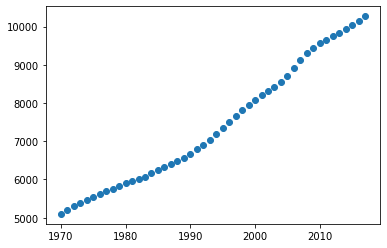

In [57]:
X= states_df.loc[states_df['State'] == "North Carolina"]

plt.scatter(X['Year'],X['Pop. (1000s)'])

In [58]:
# read in data
states_df = pd.read_csv("db/states_energy.csv")
states_df['Difference'] = states_df["Produced Renewable(Billion Btu)"]- states_df["Total Consumed(Billion Btu)"]
states_df = states_df.drop(['Unnamed: 0'], axis=1)
states_df = states_df.rename(columns={'Produced Renewable(Billion Btu)': 'Prod. Renewable (Bil. Btu)',
                                      'Total Consumed(Billion Btu)': 'Total Consumed (Bil. Btu)',
                                     'GDP(Million dollars)': 'GDP (Millions)', 'Population(Thousand)' : 'Pop. (1000s)',
                                     'Energy Price(dollars per million btu)': 'Energy Pr. ($/mil. btu)'})


states = states_df["State"].unique()

state_dicts = {}

for state in states:

    df = states_df.loc[states_df['State'] == state]
    
    # Population #
    #============#

    X = df['Year'].values.reshape(-1,1)
    y = df['Pop. (1000s)'].values.reshape(-1,1)


    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 14)

    # Create and fit the models for each state for RP
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Calculate the RP testing & training scores
    training_score = model.score(X_train, y_train)
    testing_score = model.score(X_test, y_test)

    # Use our models to make RP predictions
    predicted = model.predict(X_test)

    # Score the ep predictions with mse and r2 for each state
    mse = mean_squared_error(y_test, predicted)
    r2 = r2_score(y_test, predicted)

    # Make predictions for RP with MLR
    pop_predictions = []
    for i in range(2018, 2031):
        i_prediction = model.predict([[i]])
        pop_predictions.append(float(i_prediction))
        
        
    
    df = states_df.loc[states_df['State'] == state]
    
    
    
    
    
    
    
     # Renewable Production #
    #======================#

    X = df['Year'].values.reshape(-1,1)
    y = df['Prod. Renewable (Bil. Btu)'].values.reshape(-1,1)


    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 14)

    # Create and fit the models for each state for RP
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Calculate the RP testing & training scores
    training_score = model.score(X_train, y_train)
    testing_score = model.score(X_test, y_test)

    # Use our models to make RP predictions
    predicted = model.predict(X_test)

    # Score the ep predictions with mse and r2 for each state
    mse = mean_squared_error(y_test, predicted)
    r2 = r2_score(y_test, predicted)

    # Make predictions for RP with MLR
    rp_predictions = []
    for i in range(2018, 2031):
        i_prediction = model.predict([[i]])
        rp_predictions.append(float(i_prediction))
        
        
    
    
    
     # Energy Price #
     #==============#

    X = df['Year'].values.reshape(-1,1)
    y = df['Energy Pr. ($/mil. btu)'].values.reshape(-1,1)


    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 14)

    # Create and fit the models for each state for RP
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Calculate the RP testing & training scores
    training_score = model.score(X_train, y_train)
    testing_score = model.score(X_test, y_test)

    # Use our models to make RP predictions
    predicted = model.predict(X_test)

    # Score the ep predictions with mse and r2 for each state
    mse = mean_squared_error(y_test, predicted)
    r2 = r2_score(y_test, predicted)

    # Make predictions for RP with MLR
    ep_predictions = []
    for i in range(2018, 2031):
        i_prediction = model.predict([[i]])
        ep_predictions.append(float(i_prediction))
        
    
         #  Consumption  #
         #==============#

    X = df['Year'].values.reshape(-1,1)
    y = df['Total Consumed (Bil. Btu)'].values.reshape(-1,1)


    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 14)

    # Create and fit the models for each state for RP
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Calculate the RP testing & training scores
    training_score = model.score(X_train, y_train)
    testing_score = model.score(X_test, y_test)

    # Use our models to make RP predictions
    predicted = model.predict(X_test)

    # Score the ep predictions with mse and r2 for each state
    mse = mean_squared_error(y_test, predicted)
    r2 = r2_score(y_test, predicted)

    # Make predictions for RP with MLR
    consume_predictions = []
    for i in range(2018, 2031):
        i_prediction = model.predict([[i]])
        consume_predictions.append(float(i_prediction))
    
    
    
    # Energy Difference #
    #==================#

    X = df['Year'].values.reshape(-1,1)
    y = df['Difference'].values.reshape(-1,1)


    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 14)

    # Create and fit the models for each state for RP
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Calculate the RP testing & training scores
    training_score = model.score(X_train, y_train)
    testing_score = model.score(X_test, y_test)

    # Use our models to make RP predictions
    predicted = model.predict(X_test)

    # Score the ep predictions with mse and r2 for each state
    mse = mean_squared_error(y_test, predicted)
    r2 = r2_score(y_test, predicted)

    # Make predictions for RP with MLR
    ed_predictions = []
    for i in range(2018, 2031):
        i_prediction = model.predict([[i]])
        ed_predictions.append(float(i_prediction))
    
    
    
    # Update States Dictionary
    state_dicts.update({state: {
                        'State': list([state] * len(range(2018, 2031))),
                        'Year': list(range(2018, 2031)),
                        'Prod. Renewable (Bil. Btu)': rp_predictions,
                        'Pop. (1000s)': pop_predictions,
                        'Energy Pr. ($/mil. btu)': ep_predictions,
                        'Total Consumed (Bil. Btu)': consume_predictions,
                        'Difference': ed_predictions
                        }})


states_df
state_dicts

{'Alaska': {'State': ['Alaska',
   'Alaska',
   'Alaska',
   'Alaska',
   'Alaska',
   'Alaska',
   'Alaska',
   'Alaska',
   'Alaska',
   'Alaska',
   'Alaska',
   'Alaska',
   'Alaska'],
  'Year': [2018,
   2019,
   2020,
   2021,
   2022,
   2023,
   2024,
   2025,
   2026,
   2027,
   2028,
   2029,
   2030],
  'Prod. Renewable (Bil. Btu)': [22135.11086892872,
   22420.928250756348,
   22706.745632583974,
   22992.5630144116,
   23278.380396239343,
   23564.19777806697,
   23850.015159894596,
   24135.832541722222,
   24421.64992354985,
   24707.467305377475,
   24993.284687205218,
   25279.102069032844,
   25564.91945086047],
  'Pop. (1000s)': [796.5983685220745,
   806.1185220729385,
   815.6386756237989,
   825.158829174663,
   834.678982725527,
   844.1991362763911,
   853.7192898272551,
   863.2394433781192,
   872.7595969289832,
   882.2797504798473,
   891.7999040307113,
   901.3200575815754,
   910.8402111324394],
  'Energy Pr. ($/mil. btu)': [20.211738020104804,
   20.6553

In [59]:
# Create Dictionary of DataFrames
dfs = {}
for state in state_dicts:
    dfs.update({state: pd.DataFrame(state_dicts[state])})

# Append new DataFrames to previous states_df
for state in dfs:
    states_df = states_df.append(dfs[state],ignore_index=True)


states_df = states_df.sort_values(by=["State","Year"])
states_df.head()


/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Difference,Energy Pr. ($/mil. btu),GDP (Millions),Pop. (1000s),Prod. Renewable (Bil. Btu),State,Total Consumed (Bil. Btu),Year
1,-1261026.0,1.37,0.0,3451.0,132471.0,Alabama,1393497.0,1970
52,-1226758.0,1.51,0.0,3497.0,158182.0,Alabama,1384940.0,1971
103,-1313093.0,1.61,0.0,3539.0,164946.0,Alabama,1478039.0,1972
154,-1345503.0,1.84,0.0,3580.0,181706.0,Alabama,1527209.0,1973
205,-1380923.0,2.50,0.0,3626.0,166734.0,Alabama,1547657.0,1974


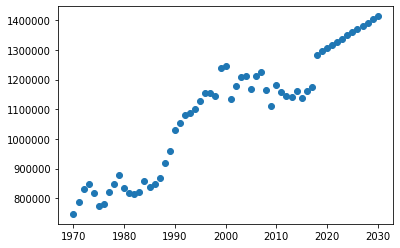

In [101]:
X= states_df.loc[states_df['State'] == "Mississippi"]

plt.scatter(X['Year'],X['Total Consumed (Bil. Btu)'])
#plt.plot(X['Year'], X['Total Consumed (Bil. Btu)'])

In [61]:
states_df = states_df[['State','Year','Prod. Renewable (Bil. Btu)','Pop. (1000s)','Energy Pr. ($/mil. btu)',
                       'Total Consumed (Bil. Btu)','Difference']]


In [62]:
states_df.to_csv('db/states_complete_mlr.csv', float_format='%.1f')